# Maschinellen Lernen
# Aufgabenblatt 02 - Aufgabe 01
# Prof. Dr. David Spieler

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
boston = load_boston()

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

# Aufgabe 1.2
Die Variable ist ein Dictionary u.a. mit 
- 'data': den Feature-Daten
- 'target': den Ausgabewerten
- 'feature_names': den Namen der Features

In [4]:
X = pd.DataFrame(boston.data)

In [5]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Aufgabe 2.5
Die Featurespaltenbeschriftung fehlt.

In [6]:
X.columns = boston.feature_names

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
y = pd.DataFrame(boston.target)
y.columns = ['MEDV']

In [9]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe99fa8f208>,
      dtype=object)

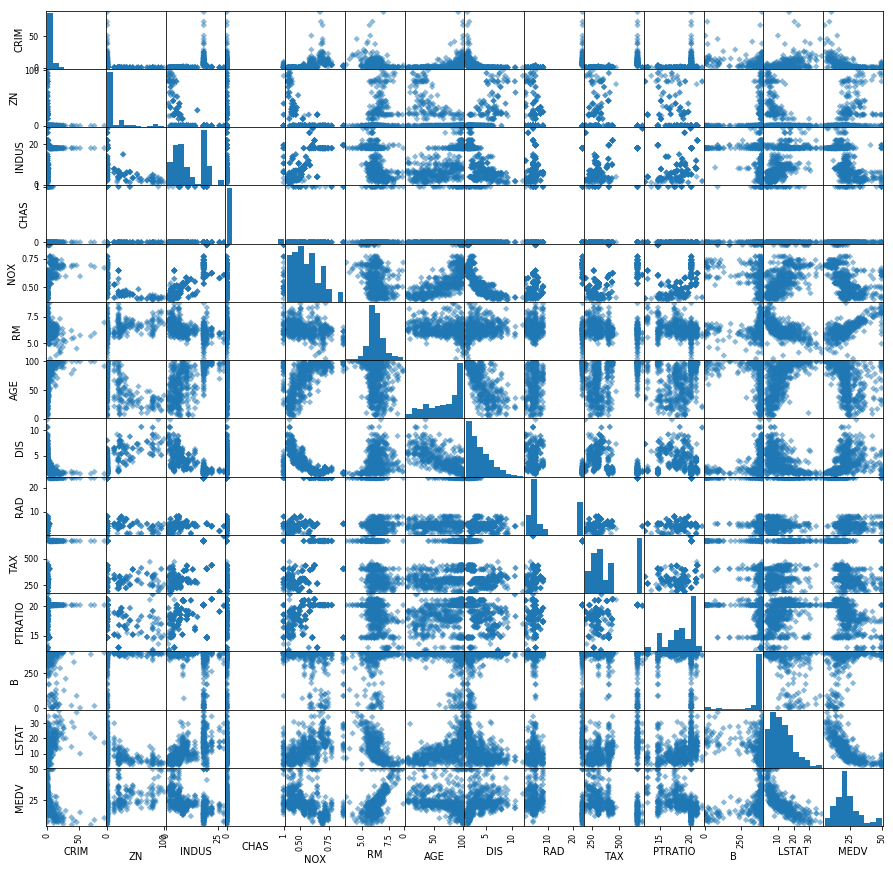

In [10]:
full = pd.concat([X, y], axis=1, sort=False)
scatter_matrix(full, figsize=(15,15), marker='D', s=20)

# Aufgabe 2.9
- LSTAT
- RM

Text(0,0.5,'medv')

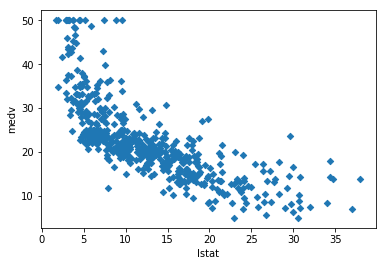

In [11]:
plt.scatter(X['LSTAT'], y, marker='D',s=20)
plt.xlabel('lstat')
plt.ylabel('medv')

In [12]:
simple_model = LinearRegression()
simple_model.fit(X[['LSTAT']], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print("w_0 =", simple_model.intercept_, ", w_1 =", simple_model.coef_)

w_0 = [34.55384088] , w_1 = [[-0.95004935]]


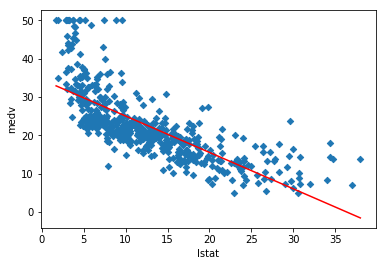

In [14]:
tX = [[X['LSTAT'].min()], [X['LSTAT'].max()]]
ty = simple_model.predict(tX)
plt.scatter(X['LSTAT'], y, marker='D',s=20)
plt.xlabel('lstat')
plt.ylabel('medv')
plt.plot(tX,ty,c='r')

# Aufgabe 2.14
Das lineare Modell als Annhäherung macht prinzipiell Sinn. Jedoch wird der Hauspreis bei geringen lstat Werten systematisch unterschätzt. Hier zeigt sich die Limitation des linearen Modells, da dort eine Nichtlinearität gefordert wäre. 

In [15]:
simple_model.score(X[['LSTAT']],y)

0.5441462975864799

# Aufgabe 2.16
Der Wert bedeutet, dass ca. die Hälfte der Varianz in den Daten durch das einfache lineare Modell erklärt wird.

In [16]:
multi_model = LinearRegression()
multi_model.fit(X[['LSTAT','RM']], y)
print(multi_model.score(X[['LSTAT','RM']], y))

0.6385616062603403


In [17]:
full_model = LinearRegression()
full_model.fit(X, y)
print(full_model.score(X, y))

0.7406077428649428


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
tts_model = LinearRegression()
tts_model.fit(X_train, y_train)
print(tts_model.score(X_test, y_test))

0.5892011519186435


# Aufgabe 2.20
- Der $R^2$-Wert ist nun von ca. 0.74 auf 0.59 gesunken. 
- Der Wert hat sich verändert, da wir nicht mehr auf dem gesamten Datensatz trainieren und wir ihn vor allem nicht mehr auf den Daten berechnen, auf denen wir das Modell trainiert haben. 
- Dass der Wert so stark sinkt ist ein Indiz dafür, dass wir vorher im Bereich der Überanpassung unterwegs waren, d.h. das Modell hat sich zu stark an die Daten angepasst und hat zu wenig generalisiert. Während wir vorher evtl. irrtümlich gedacht haben, dass das Modell relativ gut ist, müssten wir nun unsere Einschätzung überdenken. Dieses Beispiel zeigt, wie wichtig eine saubere Herangehensweise mit den richtigen Methoden v.a. der Modellauswahl ist.